In [2]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import math
import time
import Apparatus as ap
import Algorithms as alg
import time
%load_ext autoreload
%autoreload 1
%aimport Apparatus
%aimport Algorithms
%matplotlib inline
np.random.seed(1) # Reproducibility 
plt.rcParams['figure.figsize'] = (16, 16)

## 1D Signal

### Problem Setup

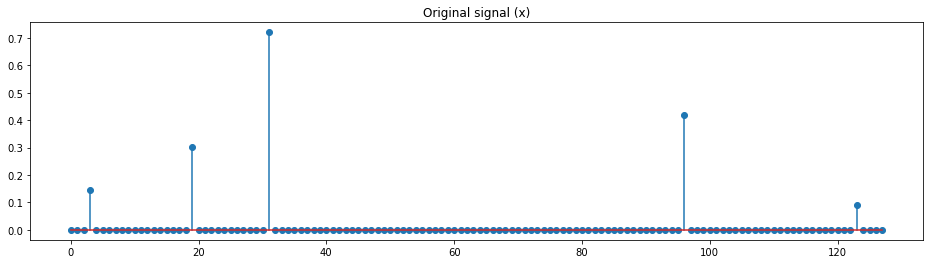

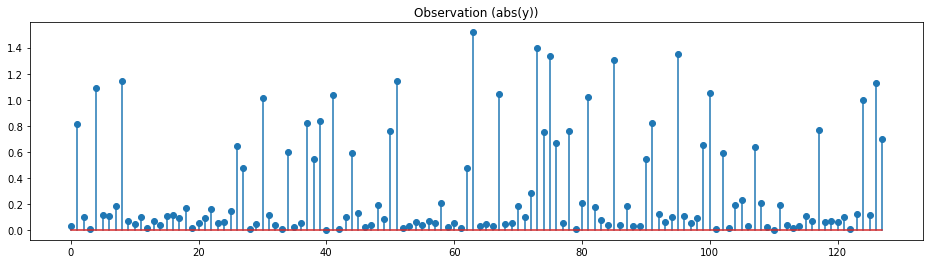

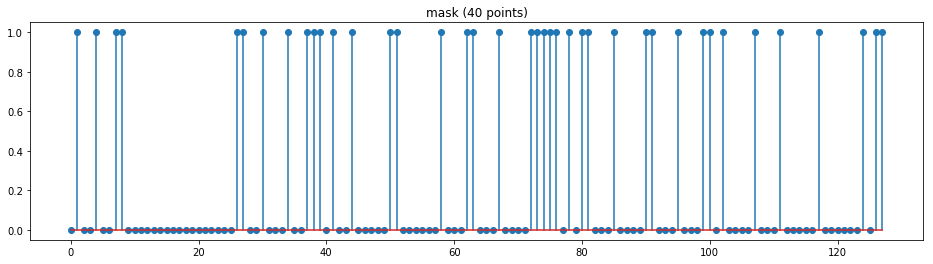

In [3]:
# parameters
gamma = .001
dim = 1
sparsity = 0.05
N = 128
n = 40 # number of samples

# initiate objects 
signalObject = ap.Signal(dim,N,n,sparsity) 
operatorObject = ap.Operator(np.fft.fft,np.fft.ifft,ap.mask1d(N,n))

# # signal 
x = signalObject.signal
plt.figure(figsize=(16,4))
plt.title('Original signal (x)')
plt.stem(np.abs(x))

# forward oprator
y = x.copy() 
y = operatorObject.A(y) + 0.1 * np.random.randn(128) ## With added AWG
plt.figure(figsize=(16,4))
plt.title('Observation (abs(y))')
plt.stem(np.abs(y))

# undersampling mask
mask = operatorObject.mask
plt.figure(figsize=(16,4))
plt.title('mask ({} points)'.format(int(sum(mask))))
plt.stem(np.abs(mask))


# Passed Arguments 
params = {}
params['A'] = operatorObject.A
params['AT'] = operatorObject.AT
params['ATA'] = operatorObject.ATA
params['y'] = y
params['Reg'] = ap.SoftThreshComplex
params['lamb'] = gamma
params['n'] = n
params['N'] = N
params['dim'] = dim
params['signal'] = x

### ISTA

Iteration:  10000
Initial True Error:  0.764834394924
Final True Error:  0.10205679853
Initial Objective Error: 0.347050380781
Final Function Error:  0.345947179091
Time:  1.391279935836792


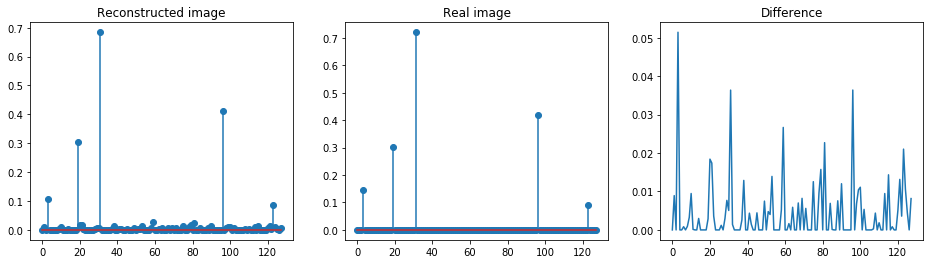

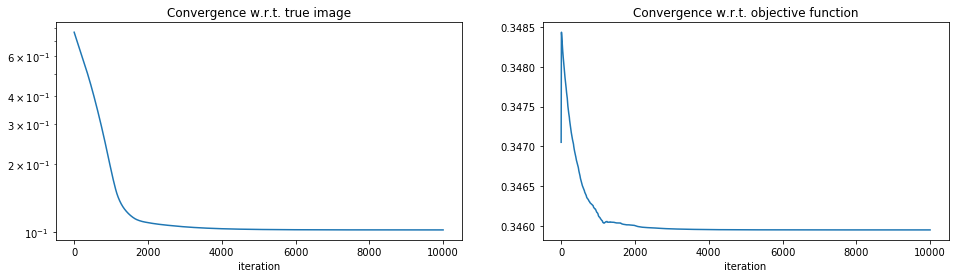

In [4]:
params['niter'] = 10000
start = time.time()
ista = alg.ISTA(params)
end = time.time()
x_ista = ista.result
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.title("Reconstructed image")
plt.stem(np.abs(x_ista))
plt.subplot(1,3,2)
plt.title("Real image")
plt.stem(np.abs(x))
plt.subplot(1,3,3)
plt.title("Difference")
plt.plot(np.abs(np.abs(x - x_ista)))
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.title("Convergence w.r.t. true image")
plt.xlabel("iteration")
plt.semilogy(ista.conv)
plt.subplot(1,2,2)
plt.title("Convergence w.r.t. objective function")
plt.xlabel("iteration")
plt.plot(ista.objective)
print("Iteration: ", ista.counter)
print("Initial True Error: ", ista.conv[0])
print("Final True Error: ", ista.conv[-1])
print("Initial Objective Error:", ista.objective[0])
print("Final Function Error: ", ista.objective[-1])
print("Time: ", end-start)

### FISTA

Iteration:  10000
Initial True Error:  0.764834394924
Final True Error:  0.102051710284
Initial Objective Error: 0.347050380781
Final Objective Error:  0.345947164147
Time:  1.4026696681976318


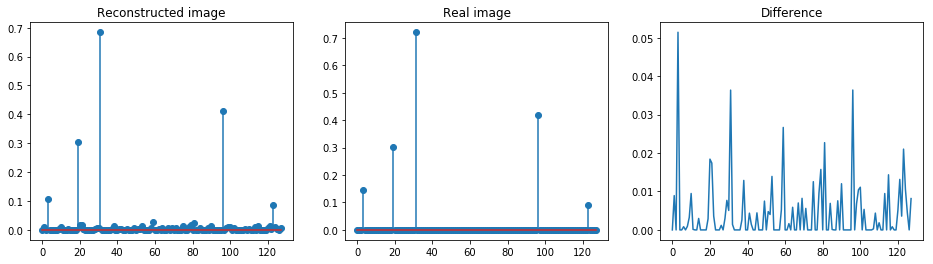

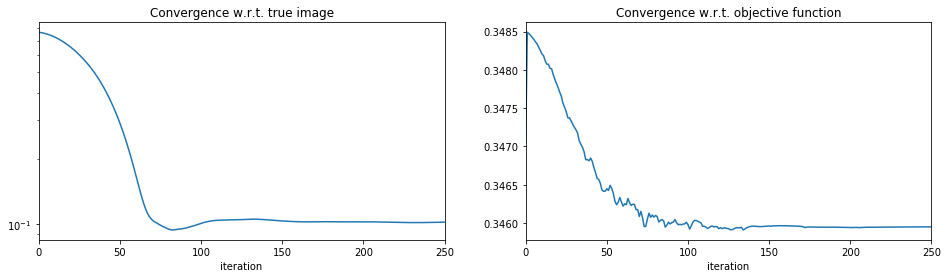

In [5]:
params['niter'] = 10000
start = time.time()
fista = alg.FISTA(params)
end = time.time()
x_fista = fista.result
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.title("Reconstructed image")
plt.stem(np.abs(x_fista))
plt.subplot(1,3,2)
plt.title("Real image")
plt.stem(np.abs(x))
plt.subplot(1,3,3)
plt.title("Difference")
plt.plot(np.abs(np.abs(x - x_fista)))
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.title("Convergence w.r.t. true image")
plt.xlabel("iteration")
plt.xlim((0,250))
plt.semilogy(fista.conv)
plt.subplot(1,2,2)
plt.title("Convergence w.r.t. objective function")
plt.xlabel("iteration")
plt.xlim((0,250))
plt.plot(fista.objective)
print("Iteration: ", fista.counter)
print("Initial True Error: ", fista.conv[0])
print("Final True Error: ", fista.conv[-1])
print("Initial Objective Error:", fista.objective[0])
print("Final Objective Error: ", fista.objective[-1])
print("Time: ", end-start)

### ADMM

Iteration:  10000
Initial True Error:  0.764834394924
Final True Error:  0.0999404966876
Initial Objective Error:  0.347050380781
Final Objective Error:  0.349968243886
Time:  9.931615829467773


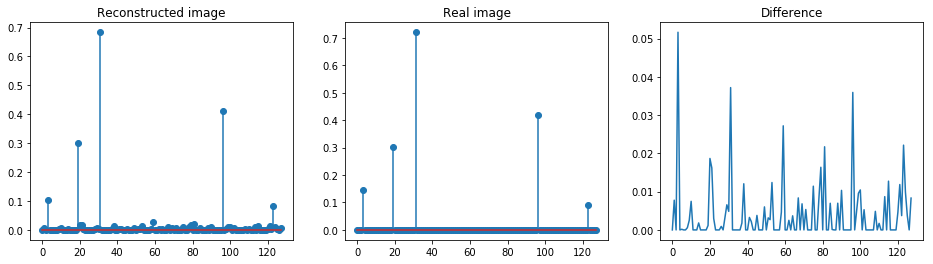

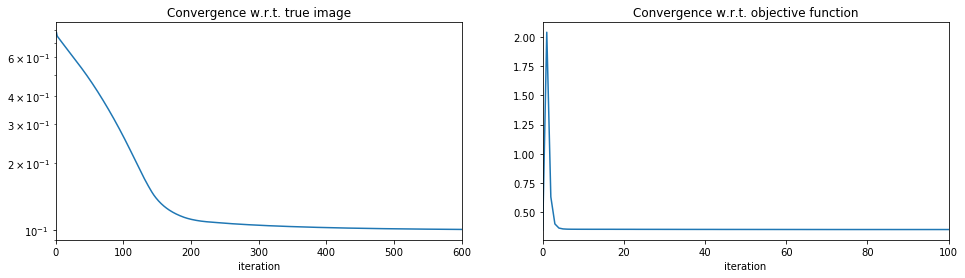

In [6]:
params['niter'] = 10000
start = time.time()
admm = alg.ADMM(params)
end = time.time()
x_admm = admm.result
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.title("Reconstructed image")
plt.stem(np.abs(x_admm))
plt.subplot(1,3,2)
plt.title("Real image")
plt.stem(np.abs(x))
plt.subplot(1,3,3)
plt.title("Difference")
plt.plot(np.abs(np.abs(x - x_admm)))
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.title("Convergence w.r.t. true image")
plt.xlabel("iteration")
plt.xlim((0,600))
plt.semilogy(admm.conv)
plt.subplot(1,2,2)
plt.title("Convergence w.r.t. objective function")
plt.xlabel("iteration")
plt.xlim((0,100))
plt.plot(admm.objective)
print("Iteration: ", admm.counter)
print("Initial True Error: ", admm.conv[0])
print("Final True Error: ", admm.conv[-1])
print("Initial Objective Error: ", admm.objective[0])
print("Final Objective Error: ", admm.objective[-1])
print("Time: ", end-start)

### AM

Iteration:  10000
Initial True Error:  0.764834394924
Final True Error:  0.50843122766
Initial Objective Error:  0.347050380781
Final Objective Error:  0.356634939043
Time:  1.9180338382720947


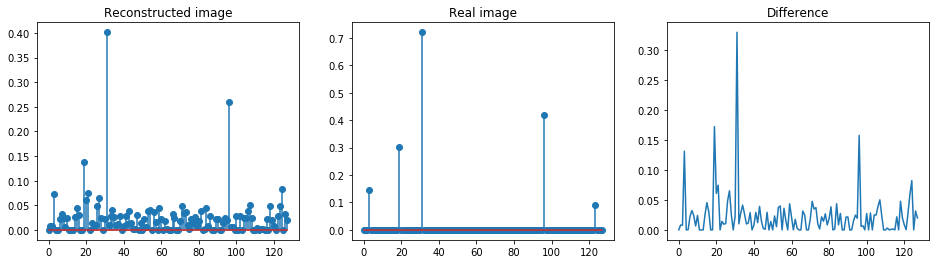

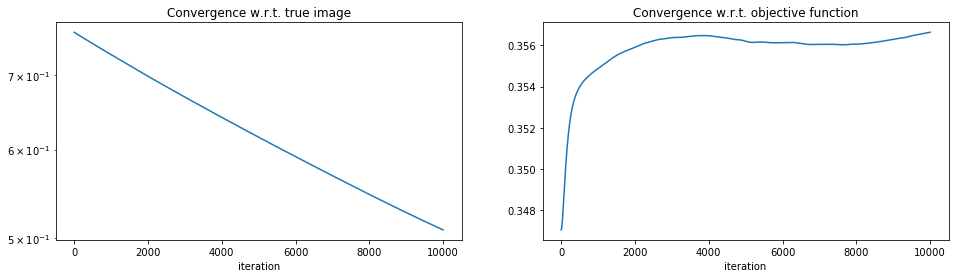

In [7]:
params['niter'] = 10000
start = time.time()
am = alg.AM(params)
end = time.time()
x_am = am.result
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.title("Reconstructed image")
plt.stem(np.abs(x_am))
plt.subplot(1,3,2)
plt.title("Real image")
plt.stem(np.abs(x))
plt.subplot(1,3,3)
plt.title("Difference")
plt.plot(np.abs(np.abs(x - x_am)))
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.title("Convergence w.r.t. true image")
plt.xlabel("iteration")
plt.semilogy(am.conv)
plt.subplot(1,2,2)
plt.title("Convergence w.r.t. objective function")
plt.xlabel("iteration")
plt.plot(am.objective)
print("Iteration: ", am.niter)
print("Initial True Error: ", am.conv[0])
print("Final True Error: ", am.conv[-1])
print("Initial Objective Error: ", am.objective[0])
print("Final Objective Error: ", am.objective[-1])
print("Time: ", end-start)

### AMP (Raw NBC)

## 1D Summary

### Magnitude

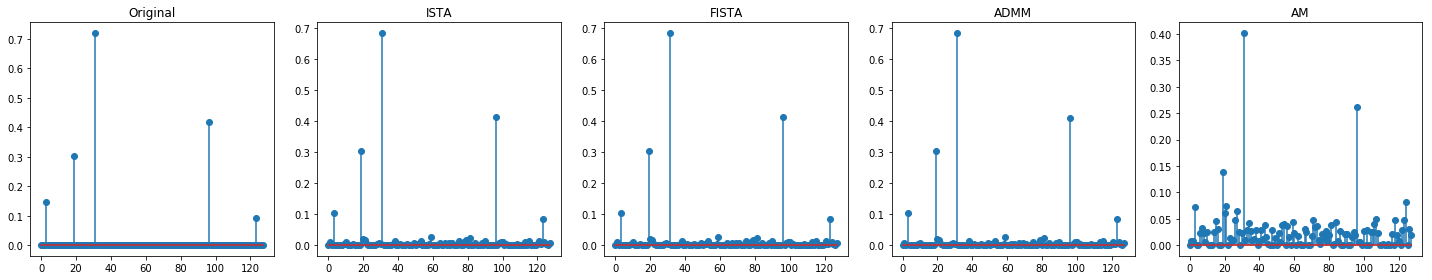

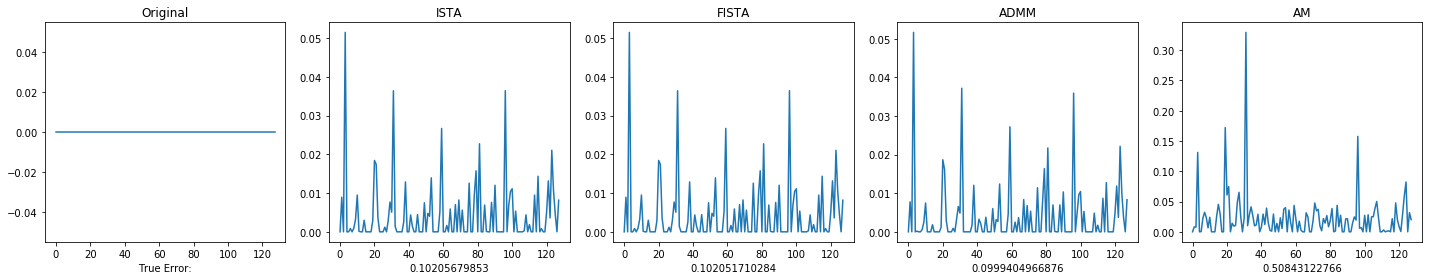

In [8]:
plt.figure(figsize=(20,4))
plt.subplot(1,5,1)
plt.title('Original')
plt.stem(np.abs(x))
plt.subplot(1,5,2)
plt.title('ISTA')
plt.stem(np.abs(x_ista))
plt.subplot(1,5,3)
plt.title('FISTA')
plt.stem(np.abs(x_fista))
plt.subplot(1,5,4)
plt.title('ADMM')
plt.stem(np.abs(x_admm))
plt.subplot(1,5,5)
plt.title('AM')
plt.stem(np.abs(x_am))
plt.tight_layout()

plt.figure(figsize=(20,4))
plt.subplot(1,5,1)
plt.title('Original')
plt.xlabel("True Error:")
plt.plot(np.abs(x - x))
plt.subplot(1,5,2)
plt.title('ISTA')
plt.xlabel(ista.conv[-1])
plt.plot(np.abs(x - x_ista))
plt.subplot(1,5,3)
plt.title('FISTA')
plt.xlabel(fista.conv[-1])
plt.plot(np.abs(x - x_fista))
plt.subplot(1,5,4)
plt.title('ADMM')
plt.xlabel(admm.conv[-1])
plt.plot(np.abs(x - x_admm))
plt.subplot(1,5,5)
plt.title('AM')
plt.xlabel(am.conv[-1])
plt.plot(np.abs(x - x_am))
plt.tight_layout()

### Phase

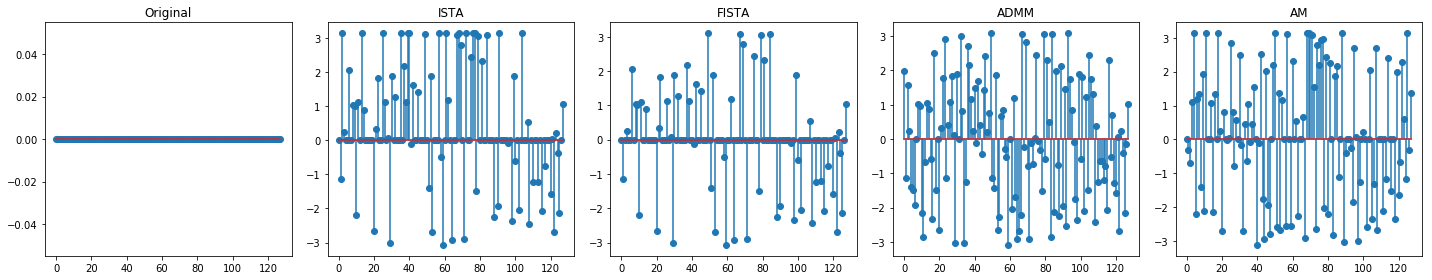

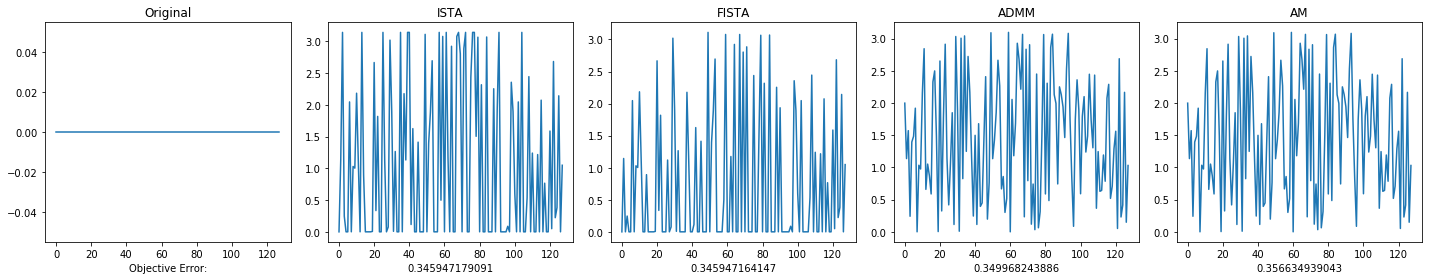

In [9]:
plt.figure(figsize=(20,4))
plt.subplot(1,5,1)
plt.title('Original')
plt.stem(np.angle(x))
plt.subplot(1,5,2)
plt.title('ISTA')
plt.stem(np.angle(x_ista))
plt.subplot(1,5,3)
plt.title('FISTA')
plt.stem(np.angle(x_fista))
plt.subplot(1,5,4)
plt.title('ADMM')
plt.stem(np.angle(x_admm))
plt.subplot(1,5,5)
plt.title('AM')
plt.stem(np.angle(x_am))
plt.tight_layout()

plt.figure(figsize=(20,4))
plt.subplot(1,5,1)
plt.title('Original')
plt.xlabel("Objective Error:")
plt.plot(np.abs(x - x))
plt.subplot(1,5,2)
plt.title('ISTA')
plt.xlabel(ista.objective[-1])
plt.plot(np.abs(np.angle(x) - np.angle(x_ista)))
plt.subplot(1,5,3)
plt.title('FISTA')
plt.xlabel(fista.objective[-1])
plt.plot(np.abs(np.angle(x) - np.angle(x_fista)))
plt.subplot(1,5,4)
plt.title('ADMM')
plt.xlabel(admm.objective[-1])
plt.plot(np.abs(np.angle(x) - np.angle(x_admm)))
plt.subplot(1,5,5)
plt.title('AM')
plt.xlabel(am.objective[-1])
plt.plot(np.abs(np.angle(x) - np.angle(x_admm)))
plt.tight_layout()

### Convergence

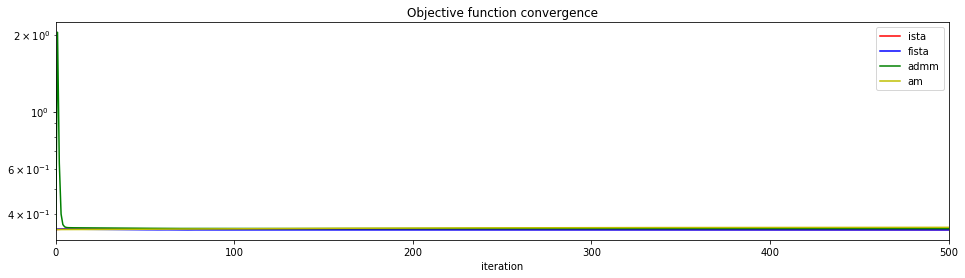

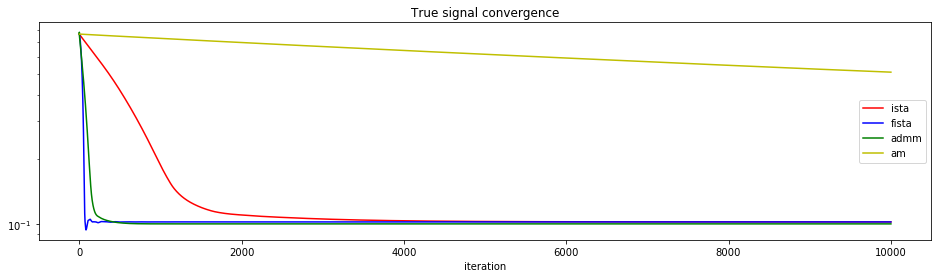

In [10]:
t = range(admm.niter + 1)

plt.figure(figsize=(16,4))
plt.title('Objective function convergence')
plt.xlabel('iteration')
plt.semilogy(t, ista.objective, 'r', label='ista')
plt.semilogy(t, fista.objective, 'b', label='fista')
plt.semilogy(t, admm.objective, 'g', label='admm')
plt.semilogy(t, am.objective, 'y', label='am')
plt.xlim((0,500))
# plt.ylim((0,1e-2))
plt.legend()
plt.show()

plt.figure(figsize=(16,4))
plt.title('True signal convergence')
plt.xlabel('iteration')
plt.semilogy(t, ista.conv, 'r', label='ista')
plt.semilogy(t, fista.conv, 'b', label='fista')
plt.semilogy(t, admm.conv, 'g', label='admm')
plt.semilogy(t, am.conv, 'y', label='am')
plt.legend()
plt.show()

## 2D Signal

### Problem Setup

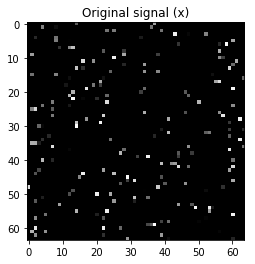

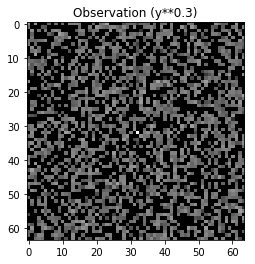

In [11]:
## Problem Setup

# parameters
gamma = 0.1
dim = 2
sparsity = 0.05
N = 64
n = 32 # number of samples per row

# initiate objects 
signalObject = ap.Signal(dim,N,n,sparsity) 
operatorObject = ap.Operator(ap.fft2c,ap.ifft2c,ap.mask2d(N,n))

# signal 
x = signalObject.signal
plt.figure(figsize=(16,4))
plt.title('Original signal (x)')
ap.imshowgray(np.abs(x))

# forward oprator
y = x.copy()
y = operatorObject.A(y)
plt.figure(figsize=(16,4))
plt.title('Observation (y**0.3)')
ap.imshowgray(np.abs(y)**0.3)

# Passed Arguments 
params = {}
params['A'] = operatorObject.A
params['AT'] = operatorObject.AT
params['ATA'] = operatorObject.ATA
params['y'] = y
params['Reg'] = ap.SoftThreshComplex
params['lamb'] = gamma
params['n'] = n
params['N'] = N
params['dim'] = dim
params['signal'] = x

### ISTA

Iteration:  10000
Initial True Error:  1.36773746246
Final True Error:  0.373447350486
Initial Objective Error:  0.568428523663
Final Objective Error:  0.520532800199
Time:  27.990737915039062


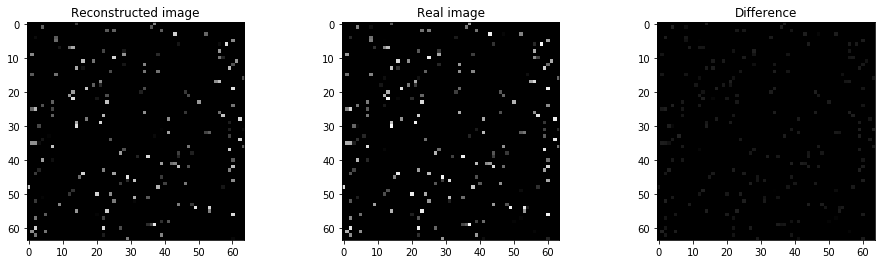

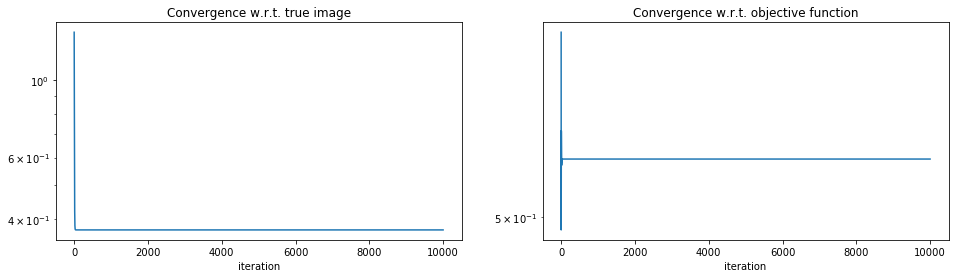

In [12]:
params['niter'] = 10000
start = time.time()
ista = alg.ISTA(params)
end = time.time()
x_ista = ista.result
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.title("Reconstructed image")
ap.imshowgray(np.abs(x_ista),0,1)
plt.subplot(1,3,2)
plt.title("Real image")
ap.imshowgray(np.abs(x),0,1)
plt.subplot(1,3,3)
plt.title("Difference")
ap.imshowgray(np.abs(x - x_ista),0,1)
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.title("Convergence w.r.t. true image")
plt.xlabel("iteration")
plt.semilogy(ista.conv)
plt.subplot(1,2,2)
plt.title("Convergence w.r.t. objective function")
plt.xlabel("iteration")
plt.semilogy(ista.objective)
print("Iteration: ", ista.niter)
print("Initial True Error: ", ista.conv[0])
print("Final True Error: ", ista.conv[-1])
print("Initial Objective Error: ", ista.objective[0])
print("Final Objective Error: ", ista.objective[-1])
print("Time: ", end-start)

### FISTA

Iteration:  10000
Initial True Error:  1.36773746246
Final True Error:  0.373447350486
Initial Objective Error:  0.568428523663
Final Objective Error:  0.520532800199
Time:  29.579453945159912


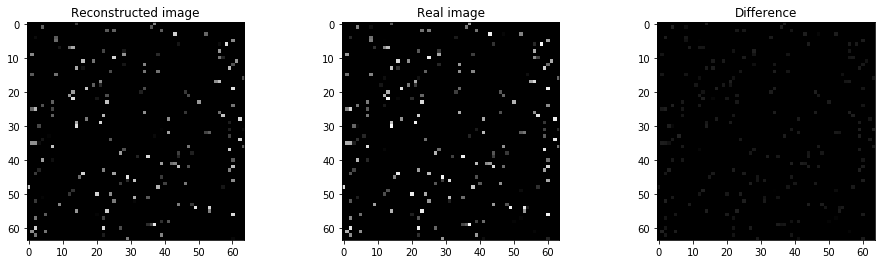

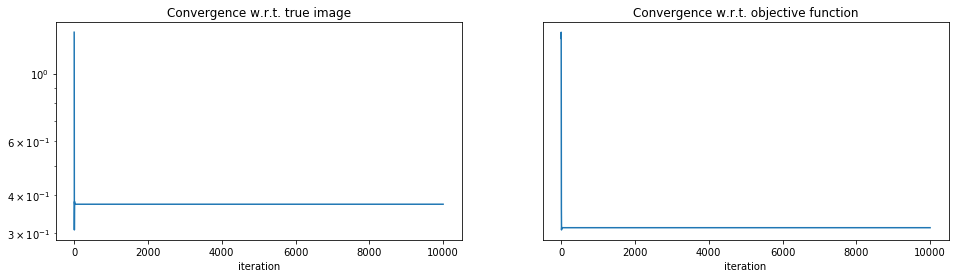

In [13]:
params['niter'] = 10000
start = time.time()
fista = alg.FISTA(params)
end = time.time()
x_fista = fista.result
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.title("Reconstructed image")
ap.imshowgray(np.abs(x_fista),0,1)
plt.subplot(1,3,2)
plt.title("Real image")
ap.imshowgray(np.abs(x),0,1)
plt.subplot(1,3,3)
plt.title("Difference")
ap.imshowgray(np.abs(x - x_fista),0,1)
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.title("Convergence w.r.t. true image")
plt.xlabel("iteration")
plt.semilogy(fista.conv)
plt.subplot(1,2,2)
plt.title("Convergence w.r.t. objective function")
plt.xlabel("iteration")
plt.semilogy(fista.objective)
print("Iteration: ", fista.niter)
print("Initial True Error: ", fista.conv[0])
print("Final True Error: ", fista.conv[-1])
print("Initial Objective Error: ", fista.objective[0])
print("Final Objective Error: ", fista.objective[-1])
print("Time: ", end-start)

### ADMM

Iteration:  10000
Initial True Error:  5.38554167538
Final True Error:  2.57709086891
Initial Objective Error:  0.568428523663
Final Objective Error:  0.571769587594
Time:  119.90294408798218


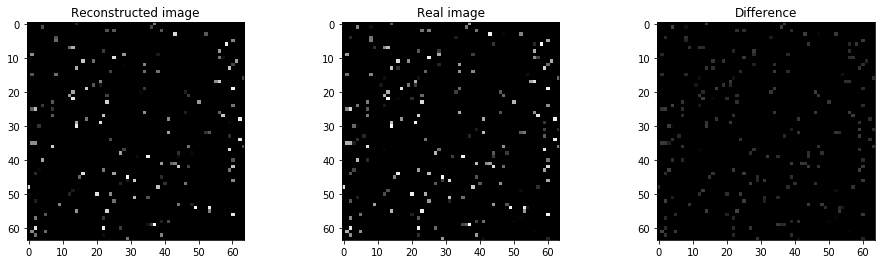

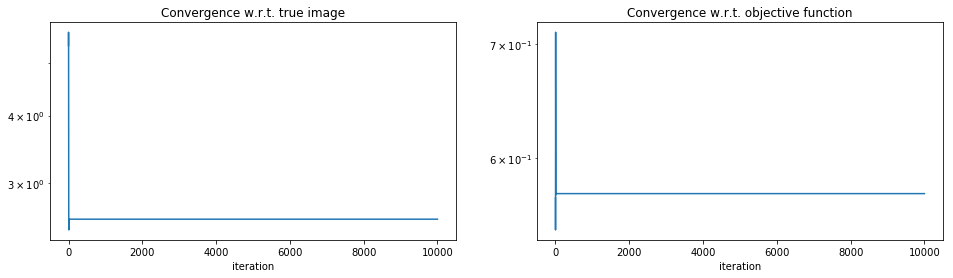

In [14]:
params['niter'] = 10000
start = time.time()
admm = alg.ADMM(params)
end = time.time()
x_admm = admm.result
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.title("Reconstructed image")
ap.imshowgray(np.abs(x_admm))
plt.subplot(1,3,2)
plt.title("Real image")
ap.imshowgray(np.abs(x))
plt.subplot(1,3,3)
plt.title("Difference")
ap.imshowgray(np.abs(x - x_admm),0,1)
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.title("Convergence w.r.t. true image")
plt.xlabel("iteration")
plt.semilogy(admm.conv)
plt.subplot(1,2,2)
plt.title("Convergence w.r.t. objective function")
plt.xlabel("iteration")
plt.semilogy(admm.objective)
print("Iteration: ", admm.niter)
print("Initial True Error: ", admm.conv[0])
print("Final True Error: ", admm.conv[-1])
print("Initial Objective Error: ", admm.objective[0])
print("Final Objective Error: ", admm.objective[-1])
print("Time: ", end-start)

### AM

Iteration:  10000
Initial True Error:  1.36773746246
Final True Error:  0.703426291109
Initial Objective Error:  0.568428523663
Final Objective Error:  0.56997465882
Time:  39.123719215393066


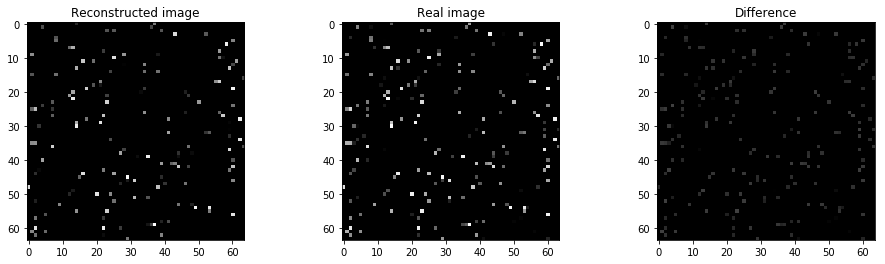

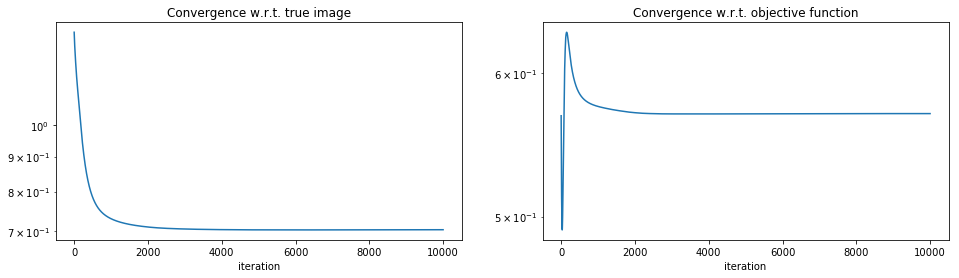

In [15]:
params['niter'] = 10000
start = time.time()
am = alg.AM(params)
end = time.time()
x_am = am.result
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.title("Reconstructed image")
ap.imshowgray(np.abs(x_am))
plt.subplot(1,3,2)
plt.title("Real image")
ap.imshowgray(np.abs(x))
plt.subplot(1,3,3)
plt.title("Difference")
ap.imshowgray(np.abs(x - x_am),0,1)
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.title("Convergence w.r.t. true image")
plt.xlabel("iteration")
plt.semilogy(am.conv)
plt.subplot(1,2,2)
plt.title("Convergence w.r.t. objective function")
plt.xlabel("iteration")
plt.semilogy(am.objective)
print("Iteration: ", am.niter)
print("Initial True Error: ", am.conv[0])
print("Final True Error: ", am.conv[-1])
print("Initial Objective Error: ", am.objective[0])
print("Final Objective Error: ", am.objective[-1])
print("Time: ", end-start)

### AMP (Raw NBC)

## 2D Summary

### Magnitude

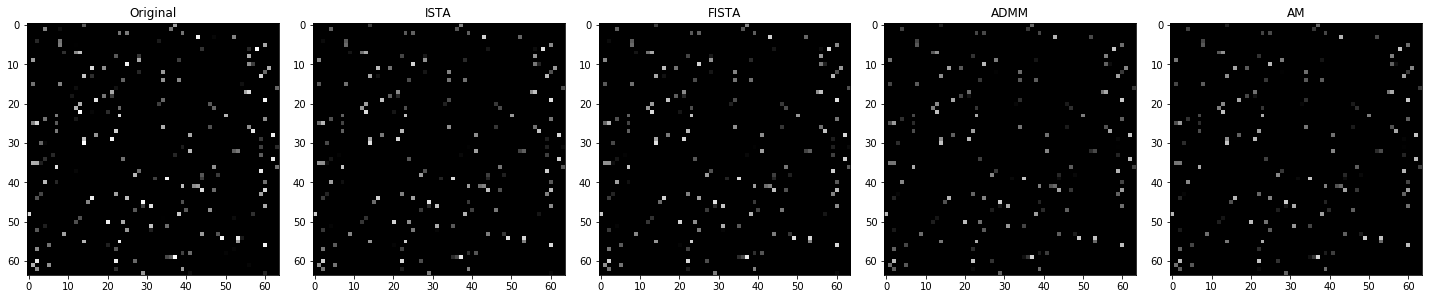

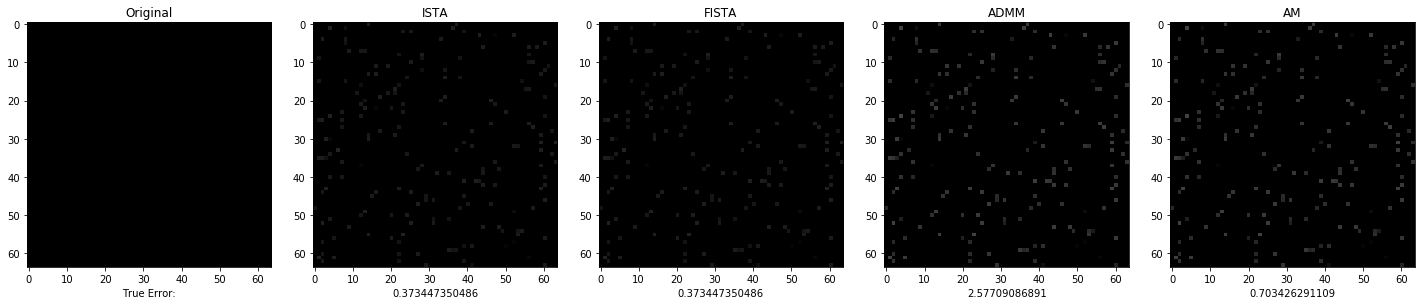

In [16]:
plt.figure(figsize=(20,4))
plt.subplot(1,5,1)
plt.title('Original')
ap.imshowgray(np.abs(x))
plt.subplot(1,5,2)
plt.title('ISTA')
ap.imshowgray(np.abs(x_ista),0,1)
plt.subplot(1,5,3)
plt.title('FISTA')
ap.imshowgray(np.abs(x_fista),0,1)
plt.subplot(1,5,4)
plt.title('ADMM')
ap.imshowgray(np.abs(x_admm),0,1)
plt.subplot(1,5,5)
plt.title('AM')
ap.imshowgray(np.abs(x_am),0,1)
plt.tight_layout()

plt.figure(figsize=(20,4))
plt.subplot(1,5,1)
plt.title('Original')
plt.xlabel("True Error:")
ap.imshowgray(np.abs(x - x))
plt.subplot(1,5,2)
plt.title('ISTA')
plt.xlabel(ista.conv[-1])
ap.imshowgray(np.abs(x - x_ista),0,1)
plt.subplot(1,5,3)
plt.title('FISTA')
plt.xlabel(fista.conv[-1])
ap.imshowgray(np.abs(x - x_fista),0,1)
plt.subplot(1,5,4)
plt.title('ADMM')
plt.xlabel(admm.conv[-1])
ap.imshowgray(np.abs(x - x_admm),0,1)
plt.subplot(1,5,5)
plt.title('AM')
plt.xlabel(am.conv[-1])
ap.imshowgray(np.abs(x - x_am),0,1)
plt.tight_layout()

### Phase

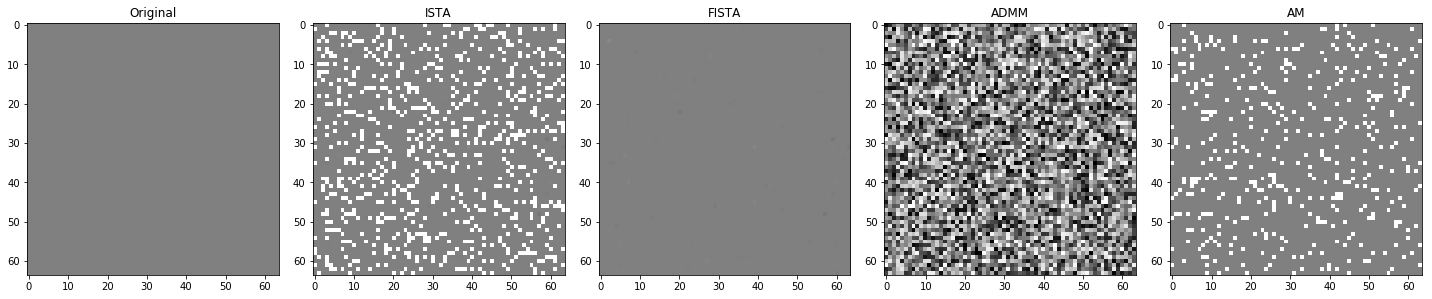

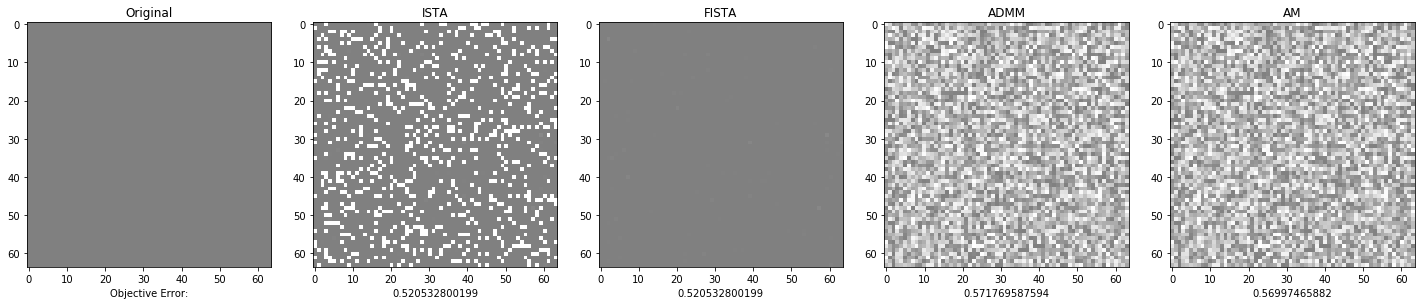

In [17]:
# np.angle correction:
# def corr(C):
#     return np.where((C > -1e-10) & (C < 1e-10))
# x_ista[corr(x_ista)] = +0
# x_fista[corr(x_fista)] = +0
# x_admm[corr(x_admm)] = +0
# x_am[corr(x_am)] = +0

plt.figure(figsize=(20,4))
plt.subplot(1,5,1)
plt.title('Original')
ap.imshowgray(np.angle(x),-np.pi,np.pi)
plt.subplot(1,5,2)
plt.title('ISTA')
ap.imshowgray(np.angle(x_ista),-np.pi,np.pi)
plt.subplot(1,5,3)
plt.title('FISTA')
ap.imshowgray(np.angle(x_fista),-np.pi,np.pi)
plt.subplot(1,5,4)
plt.title('ADMM')
ap.imshowgray(np.angle(x_admm),-np.pi,np.pi)
plt.subplot(1,5,5)
plt.title('AM')
ap.imshowgray(np.angle(x_am),-np.pi,np.pi)
plt.tight_layout()

plt.figure(figsize=(20,4))
plt.subplot(1,5,1)
plt.title('Original')
plt.xlabel("Objective Error:")
ap.imshowgray(np.abs(x - x),-np.pi,np.pi)
plt.subplot(1,5,2)
plt.title('ISTA')
plt.xlabel(ista.objective[-1])
ap.imshowgray(np.abs(np.angle(x) - np.angle(x_ista)),-np.pi,np.pi)
plt.subplot(1,5,3)
plt.title('FISTA')
plt.xlabel(fista.objective[-1])
ap.imshowgray(np.abs(np.angle(x) - np.angle(x_fista)),-np.pi,np.pi)
plt.subplot(1,5,4)
plt.title('ADMM')
plt.xlabel(admm.objective[-1])
ap.imshowgray(np.abs(np.angle(x) - np.angle(x_admm)),-np.pi,np.pi)
plt.subplot(1,5,5)
plt.title('AM')
plt.xlabel(am.objective[-1])
ap.imshowgray(np.abs(np.angle(x) - np.angle(x_admm)),-np.pi,np.pi)
plt.tight_layout()

### Convergence

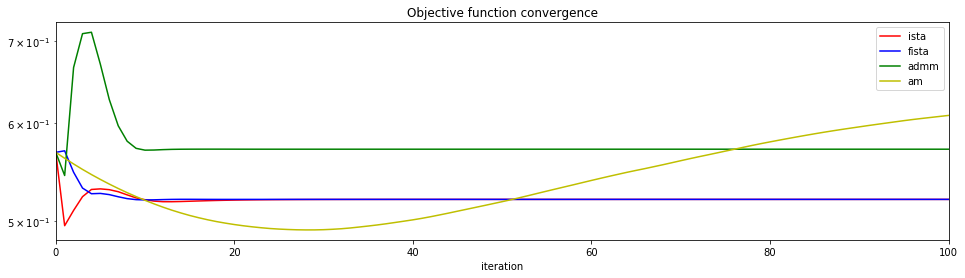

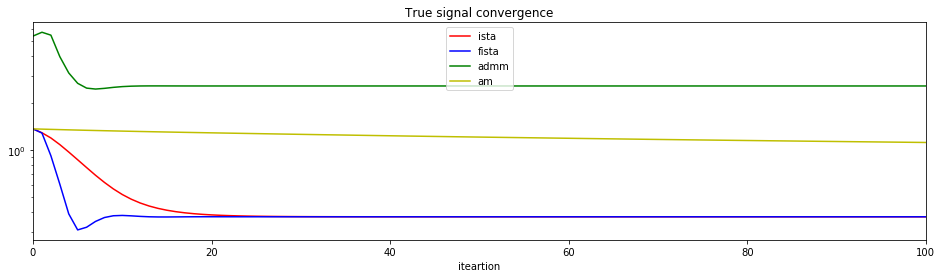

In [18]:
t = range(admm.niter + 1)

plt.figure(figsize=(16,4))
plt.title('Objective function convergence')
plt.xlabel('iteration')
plt.semilogy(t, ista.objective, 'r', label='ista')
plt.semilogy(t, fista.objective, 'b', label='fista')
plt.semilogy(t, admm.objective, 'g', label='admm')
plt.semilogy(t, am.objective, 'y', label='am')
plt.xlim((0,100))
plt.legend()
plt.show()

plt.figure(figsize=(16,4))
plt.title('True signal convergence')
plt.xlabel('iteartion')
plt.semilogy(t, ista.conv, 'r', label='ista')
plt.semilogy(t, fista.conv, 'b', label='fista')
plt.semilogy(t, admm.conv, 'g', label='admm')
plt.semilogy(t, am.conv, 'y', label='am')
plt.xlim((0,100))
plt.legend()
plt.show()